Each sample in the train and test set has the following information:

- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank)

We are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.


More details about the competition here:
https://www.kaggle.com/c/nlp-getting-started

In [11]:
from IPython.core.debugger import set_trace



import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")


In [3]:
!cd data && ls

The system cannot find the path specified.


In [3]:
txt_data = pd.read_csv('..\Data\Sentiment Analysis Dataset.csv' , sep='|', names=['col1'])

#split data into columns with ','
txt_data = txt_data.col1.str.split(',',  3, expand=True)
txt_data.columns = list(txt_data.iloc[0])
txt_data = txt_data.drop(0)
txt_data.index = np.subtract(txt_data.index, 1)
x = txt_data.groupby('Sentiment')
l=[x.get_group(i)['SentimentText'] for i in x.groups]

neg = l[0]
pos = l[1]

In [4]:
dataset = pd.concat([txt_data['SentimentText'], txt_data['Sentiment']], axis = 1).sample(frac=1).reset_index(drop=True)
dataset.columns = ['text', 'target']

train = dataset[:100000]
test = dataset[100000:120000]

In [5]:
train.head().T

,0,1,2,3,4
text,OMG law exam 2morrow :S I cant remember any of...,I asked @djseang to put &quot;I'm so special&q...,PCD it's a great group musical,@jdictionary you have your license?? I finall...,I can't wait to get the stitches removed from ...
target,1,1,1,1,0


In [6]:
test.head().T

,100000,100001,100002,100003,100004
text,"""I feel like getting wasted right now, but I h...",@mickbetancourt ok maybe I don't want to be fr...,Ahhhh I just hit a squirrel,@missladyswd girl i just saw your twit. i'm wo...,still sad. didnt get to see 17 again today
target,0,0,0,0,0


Remove URLs and HTML

In [7]:
import re


def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

In [8]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

Remove punctuation

In [9]:
import string


def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

In [10]:
train["text"] = train.text.map(lambda x: remove_URL(x))
train["text"] = train.text.map(lambda x: remove_html(x))
train["text"] = train.text.map(lambda x: remove_emoji(x))
train["text"] = train.text.map(lambda x: remove_punct(x))

<ipython-input-10-fff3295edef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["text"] = train.text.map(lambda x: remove_URL(x))
<ipython-input-10-fff3295edef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["text"] = train.text.map(lambda x: remove_html(x))
<ipython-input-10-fff3295edef4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Remove stopwords

In [11]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

In [12]:
train["text"] = train["text"].map(remove_stopwords)

<ipython-input-12-9c539947c393>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["text"] = train["text"].map(remove_stopwords)


In [13]:
train.text

0        omg law exam 2morrow cant remember sick exams ...
1        asked djseang put quotim specialquot set ampgu...
2                                  pcd great group musical
3               jdictionary license finally got mine april
4                      cant wait get stitches removed nose
                               ...                        
99995    vmcconville poor lad tom half two lads work su...
99996                wit j fresh baby t0day still sick d0g
99997    millybeeart mnstrsnmnchkns juicytots gt card 6...
99998               loving 90 degree weather going outside
99999                     rossmack right legendarymade day
Name: text, Length: 100000, dtype: object

### Basic NLP

In [14]:
from collections import Counter

# Count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [15]:
text = train.text

counter = counter_word(text)

In [16]:
len(counter)

107187

In [17]:
counter

Counter({'omg': 696,
         'law': 51,
         'exam': 355,
         '2morrow': 54,
         'cant': 3897,
         'remember': 308,
         'sick': 921,
         'exams': 246,
         'anyway': 264,
         '11am': 12,
         '2morro': 7,
         'summer': 717,
         'begins': 34,
         'somethin': 29,
         '2': 2357,
         'look': 829,
         'forward': 450,
         'asked': 117,
         'djseang': 1,
         'put': 516,
         'quotim': 27,
         'specialquot': 2,
         'set': 233,
         'ampguess': 1,
         'wht': 9,
         'pcd': 14,
         'great': 2024,
         'group': 106,
         'musical': 36,
         'jdictionary': 1,
         'license': 23,
         'finally': 719,
         'got': 3792,
         'mine': 420,
         'april': 35,
         'wait': 1369,
         'get': 5097,
         'stitches': 11,
         'removed': 26,
         'nose': 96,
         'wants': 427,
         'loved': 271,
         'germanman': 1,
         'see

In [18]:
num_words = len(counter)

# Max number of words in a sequence
max_length = 50

Train / test split

In [19]:
train_size = int(train.shape[0] * 0.8)

train_sentences = train.text[:train_size]
train_labels = train.target[:train_size]

test_sentences = train.text[train_size:]
test_labels = train.target[train_size:]

In [20]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_sentences)

In [21]:
word_index = tokenizer.word_index

In [22]:
word_index

{'im': 1,
 'good': 2,
 'day': 3,
 'get': 4,
 'like': 5,
 'go': 6,
 'dont': 7,
 'today': 8,
 'love': 9,
 'going': 10,
 'work': 11,
 'cant': 12,
 'got': 13,
 'lol': 14,
 'back': 15,
 'time': 16,
 'u': 17,
 'one': 18,
 'know': 19,
 'really': 20,
 'well': 21,
 'see': 22,
 'want': 23,
 'still': 24,
 'new': 25,
 'think': 26,
 'amp': 27,
 'thanks': 28,
 'oh': 29,
 'home': 30,
 'night': 31,
 '2': 32,
 'miss': 33,
 'much': 34,
 'need': 35,
 'last': 36,
 'hope': 37,
 'great': 38,
 'morning': 39,
 'tomorrow': 40,
 'thats': 41,
 'twitter': 42,
 'ill': 43,
 'haha': 44,
 'fun': 45,
 'didnt': 46,
 'sad': 47,
 'right': 48,
 'feel': 49,
 'would': 50,
 'happy': 51,
 'wish': 52,
 'tonight': 53,
 'sleep': 54,
 'sorry': 55,
 'bad': 56,
 'come': 57,
 'make': 58,
 'gonna': 59,
 'way': 60,
 'getting': 61,
 'though': 62,
 'nice': 63,
 'ive': 64,
 'better': 65,
 'wait': 66,
 'watching': 67,
 'could': 68,
 'yeah': 69,
 'week': 70,
 'youre': 71,
 'bed': 72,
 'school': 73,
 'hate': 74,
 'hey': 75,
 'even': 76,
 'p

In [23]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)

In [24]:
train_sequences[0]

[158,
 1725,
 345,
 1651,
 12,
 378,
 112,
 482,
 442,
 5149,
 7287,
 145,
 2385,
 3317,
 32,
 125,
 278,
 32]

In [25]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [26]:
train_padded[0]

array([ 158, 1725,  345, 1651,   12,  378,  112,  482,  442, 5149, 7287,
        145, 2385, 3317,   32,  125,  278,   32,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [27]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [28]:
print(train.text[0])
print(train_sequences[0])

omg law exam 2morrow cant remember sick exams anyway 11am 2morro summer begins somethin 2 look forward 2
[158, 1725, 345, 1651, 12, 378, 112, 482, 442, 5149, 7287, 145, 2385, 3317, 32, 125, 278, 32]


Check inverse

In [29]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [30]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [31]:
decode(train_sequences[0])

'omg law exam 2morrow cant remember sick exams anyway 11am 2morro summer begins somethin 2 look forward 2'

In [32]:
print(f"Shape of train {train_padded.shape}")
print(f"Shape of test {test_padded.shape}")

Shape of train (80000, 50)
Shape of test (20000, 50)


In [33]:
max_length

50

In [34]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
#from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam

model = Sequential()

model.add(Embedding(num_words, 32, input_length=max_length))
model.add(LSTM(64, dropout=0.1))
model.add(Dense(1, activation="sigmoid"))



model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            3429984   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 3,454,881
Trainable params: 3,454,881
Non-trainable params: 0
_________________________________________________________________


In [36]:
test_labels = pd.to_numeric(test_labels)
train_labels = pd.to_numeric(train_labels)

In [37]:
history = model.fit(
    train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels),
)

Epoch 1/10
2500/2500 [==============================] - 83s 26ms/step - loss: 0.6801 - accuracy: 0.5395 - val_loss: 0.6633 - val_accuracy: 0.5817
Epoch 2/10
 278/2500 [==>...........................] - ETA: 56s - loss: 0.6656 - accuracy: 0.5729

KeyboardInterrupt: 

In [ ]:
y_pred_keras = model.predict(test_padded).ravel()

base_roc = pd.DataFrame([test_labels, y_pred_keras]).T
base_roc.columns = ['test_labels', 'y_pred_keras']
base_roc.to_csv('base_roc.csv')

In [13]:
from sklearn.metrics import roc_curve,precision_recall_curve
from sklearn.metrics import auc

In [32]:
# Baseline
base_roc = pd.read_csv('base_roc.csv',index_col=0)
y_pred_keras= base_roc["y_pred_keras"].astype(float)
test_labels = base_roc["test_labels"].astype(float)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_labels, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

precision, recall, thresholds = precision_recall_curve(test_labels, y_pred_keras)

In [4]:
#inverse the labels to get the negative rates
inversed_y_pred_keras = pd.DataFrame(y_pred_keras).apply(lambda x: abs(x-1))
#false positivee is true negative here and true positive is false negative
tnr_keras, fnr_keras, thresholds_keras2 = roc_curve(test_labels, inversed_y_pred_keras)
auc_keras2 = auc(fnr_keras, tnr_keras)

In [6]:
elmo_roc

,test_labels,y_pred_keras
8000,0,NaN
8001,0,NaN
8002,1,NaN
8003,1,NaN
8004,0,NaN
...,...,...
9995,0,NaN
9996,0,NaN
9997,0,NaN
9998,0,NaN


In [108]:
# Elmo
elmo_roc = pd.read_csv('elmo_roc5.csv',index_col=0)
y_pred_keras_elmo= elmo_roc["y_pred_keras"].astype(float)
test_labels_elmo = elmo_roc["test_labels"].astype(float)
fpr_keras_elmo, tpr_keras_elmo, thresholds_keras_elmo = roc_curve(test_labels_elmo, y_pred_keras_elmo)
auc_keras_elmo = auc(fpr_keras_elmo, tpr_keras_elmo)

precision_elmo, recall_elmo, thresholds_elmo = precision_recall_curve(test_labels_elmo, y_pred_keras_elmo)

In [109]:
#Glove
glove_roc = pd.read_csv('glove_roc.csv',index_col=0)
y_pred_glove= glove_roc["y_pred_keras"].astype(float)
test_labels_glove = glove_roc["test_labels"].astype(float)
fpr_keras_glove, tpr_keras_glove, thresholds_keras_glove = roc_curve(test_labels_glove, y_pred_glove)
auc_keras_glove = auc(fpr_keras_glove, tpr_keras_glove)

precision_glove, recall_glove, thresholds_glove = precision_recall_curve(test_labels_glove, y_pred_glove)

In [110]:
# BERT
bert_roc = pd.read_csv('../Data Preprocessed/bert.csv',index_col=0)
y_pred_bert= bert_roc["y_pred"].astype(float)
test_labels_bert = bert_roc["test_labels"].astype(float)
fpr_keras_bert, tpr_keras_bert, thresholds_keras_bert = roc_curve(test_labels_bert, y_pred_bert)
auc_keras_bert = auc(fpr_keras_bert, tpr_keras_bert)

precision_bert, recall_bert, thresholds_bert = precision_recall_curve(test_labels_bert, y_pred_bert)

In [111]:
# from sklearn.ensemble import RandomForestClassifier
# # Supervised transformation based on random forests
# rf = RandomForestClassifier(max_depth=3, n_estimators=10)
# rf.fit(train_padded, train_labels)

# y_pred_rf = rf.predict_proba(test_padded)[:, 1]
# fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_labels, y_pred_rf)
# auc_rf = auc(fpr_rf, tpr_rf)

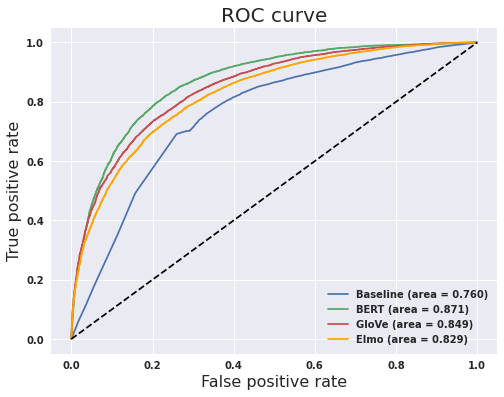

In [112]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr_keras, tpr_keras, label='Baseline (area = {:.3f})'.format(auc_keras))
ax.plot(fpr_keras_bert, tpr_keras_bert, label='BERT (area = {:.3f})'.format(auc_keras_bert))
ax.plot(fpr_keras_glove, tpr_keras_glove, label='GloVe (area = {:.3f})'.format(auc_keras_glove))
ax.plot(fpr_keras_elmo, tpr_keras_elmo, label='Elmo (area = {:.3f})'.format(auc_keras_elmo),color='orange')

#ax.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
ax.set_title('ROC curve', fontsize=20)
ax.set_xlabel('False positive rate', fontsize=16)
ax.set_ylabel('True positive rate', fontsize=16)
leg = ax.legend(loc='best')
plt.savefig('comparison_ROC.png', facecolor='w')
plt.show()

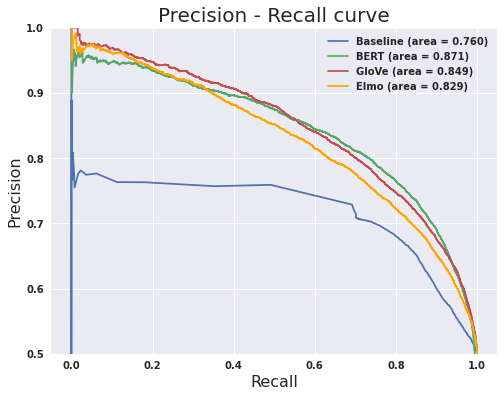

In [113]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(recall, precision,  label='Baseline (area = {:.3f})'.format(auc_keras))
ax.plot(recall_bert, precision_bert, label='BERT (area = {:.3f})'.format(auc_keras_bert))
ax.plot(recall_glove, precision_glove, label='GloVe (area = {:.3f})'.format(auc_keras_glove))
ax.plot(recall_elmo, precision_elmo, label='Elmo (area = {:.3f})'.format(auc_keras_elmo),color='orange')

#ax.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
#plt.plot([0, 1], [0, 1], 'k--')
ax.set_title('Precision - Recall curve', fontsize=20)
ax.set_xlabel('Recall', fontsize=16)
ax.set_ylabel('Precision', fontsize=16)
ax.set_ylim(0.5,1)
leg = ax.legend(loc='best')
plt.savefig('comparison_prerecall.png', facecolor='w')
plt.show()

In [123]:
from sklearn.metrics import roc_curve, classification_report

print(classification_report(test_labels_bert.values, np.round(y_pred_bert)))

              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80     10704
         1.0       0.76      0.82      0.78      9296

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000



In [ ]:
from matplotlib.pyplot import gca
font2 = {'family' : 'normal',
  'weight' : 'bold',
  'size' : 10}
a = gca()
a.set_xticklabels(a.get_xticks(), font2)
a.set_yticklabels(a.get_yticks(), font2)

# Confusion matrix

In [114]:
df = pd.DataFrame([y_pred_keras_elmo.values,test_labels_elmo.values]).T
df.columns = ["predicted","target"]
#make predictions either 0 or 1
df["predicted"] = df["predicted"].apply(lambda x: round(float(x)))
# test_labels.index = df.index
# df = pd.concat([df,test_labels], axis =1)
df

,predicted,target
0,1,1.0
1,1,1.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
19995,0,0.0
19996,0,0.0
19997,0,1.0
19998,1,1.0


In [115]:
import matplotlib
font = {'family' : 'normal',
  'weight' : 'bold',
  'size' : 18}
matplotlib.rc('font', **font)

In [59]:
confusion_matrix[0][0] = confusion_matrix[0][0] * 10 + np.random.randint(0,10)
confusion_matrix[1][0] = confusion_matrix[1][0] * 10 + np.random.randint(0,10)
confusion_matrix[0][1] = confusion_matrix[0][1] * 10 + np.random.randint(0,10)
confusion_matrix[1][1] = confusion_matrix[1][1] * 10 + np.random.randint(0,10)

In [64]:
confusion_matrix

Predicted,0,1
Actual,,
0.0,7612,2081
1.0,2468,7857


In [65]:
labels

array([['True Positives\n 761.000', 'False Negatives\n 208.000'],
       ['False Positives\n 246.000', 'True Negatives\n 785.000']],
      dtype='<U24')

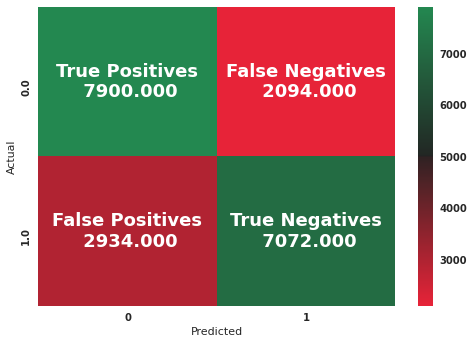

In [117]:
import seaborn as sn
confusion_matrix = pd.crosstab(df['target'], df['predicted'], rownames=['Actual'], colnames=['Predicted'])
strings = strings = np.asarray([['True Positives\n', 'False Negatives\n'],
                                ['False Positives\n', 'True Negatives\n']])
labels = (np.asarray(["{0} {1:.3f}".format(string, value)
                      for string, value in zip(strings.flatten(),
                                               confusion_matrix.values.flatten())])
         ).reshape(2, 2)
cmap = sn.diverging_palette(10, 140, s=90, l=50, n=100,sep=1,center = 'dark', as_cmap=True)
fig, ax = plt.subplots()
sn.heatmap(confusion_matrix, annot=labels, fmt="", cmap=cmap, ax=ax)
plt.savefig('elmo_confusion.png', facecolor='w')
plt.show()


In [ ]:
plt.clf()
plt.imshow(strings, interpolation='nearest', cmap=plt.strings.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(strings[i][j]))
plt.show()